# KNN em Python

Dependências

In [0]:
%matplotlib inline
import time

from IPython.display import display, clear_output, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', palette='pastel')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

def bigprint(*args):
    display(HTML('<h3>' + ' '.join(str(arg) for arg in args) + '</h3>'))

## Dados: Imagens de dígitos (0-9) escritos à mão

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.



X[0, :] =
 [[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.    ]
 [0.     0.     0.8125 0.9375 0.625  0.9375 0.3125 0.    ]
 [0.     0.1875 0.9375 0.125  0.     0.6875 0.5    0.    ]
 [0.     0.25   0.75   0.     0.     0.5    0.5    0.    ]
 [0.     0.3125 0.5    0.     0.     0.5625 0.5    0.    ]
 [0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.    ]
 [0.     0.125  0.875  0.3125 0.625  0.75   0.     0.    ]
 [0.     0.     0.375  0.8125 0.625  0.     0.     0.    ]]


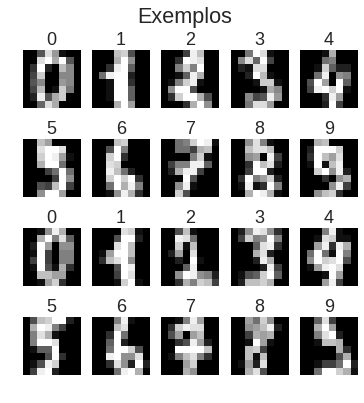

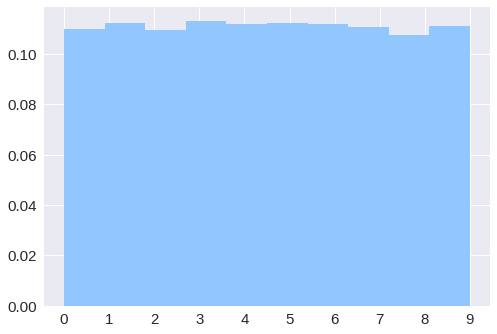

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data / digits.data.max()
y = digits.target

# separa 90% do conjunto para treino e 10% para teste
train_split = 0.9
num_samples = X.shape[0]
split_idx = int(train_split * num_samples)

X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

# imprime informações
print('\n'.join(digits.DESCR.split('\n')[:19]))
bigprint('shape(X) =', X.shape)

# visualiza imagens
plt.figure(figsize=(6,6));
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Exemplos')
ncols = 5
nrows = 4
# for i, idx in enumerate(np.random.permutation(X.shape[0])[:25]):
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.imshow(X[i, :].reshape(8, 8), cmap='gray');
    ax.axis('off');
    ax.set_title(str(y[i]));

print('X[0, :] =\n', X[0, :].reshape(8, 8))

# plota histograma
plt.figure();
plt.hist(y, bins=10, normed=True);
plt.xticks(range(10));

## scikit-learn (KNeighborsClassifier)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
bigprint('accuracy:', accuracy_score(y_test, y_pred))

## numpy: KNN "aleatório"

In [13]:
class DummyClassifier:
    def __init__(self, random_state=123):
        # semente fixa para garantir repetibilidade
        self.rng = np.random.RandomState(seed=random_state)
        self.labels = None

    def fit(self, X, y):
        # identifica os labels possíveis (0-9)
        self.labels = np.unique(y)

    def predict(self, X_test):
        # retorna uma label aleatória para cada amostra de teste
        num_samples = X_test.shape[0]
        return self.rng.choice(self.labels, size=num_samples, replace=True)


dummyclf = DummyClassifier()
dummyclf.fit(X_train, y_train)
y_pred = dummyclf.predict(X_test)
bigprint('accuracy:', accuracy_score(y_test, y_pred))      

## numpy: kNN com k = 1 e distância Euclideana

In [14]:
class MyNearestNeighborClassifier:
    def __init__(self):
        self.X = None
        self.y = None

    def fit(self, X, y):
        # "decora" todo o conjunto de treino
        self.X = X
        self.y = y

    def predict(self, X_test):
        preds = []

        # itera nas linhas da matriz X_test
        for sample in X_test:

            # calcula distância Euclideana entre a amostra
            # de teste e todo o conjunto de dados utilizando
            # operações vetorizadas do NumPy
            distances = np.sum((self.X - sample) ** 2, axis=1)

            # identifica qual exemplo de treino tem a menor distância
            y_index = np.argmin(distances)

            # recupera label do exemplo de menor distância
            label = self.y[y_index]
            preds.append(label)

        return np.array(preds)


myclf = MyNearestNeighborClassifier()
myclf.fit(X_train, y_train)
y_pred = myclf.predict(X_test)
bigprint('accuracy:', accuracy_score(y_test, y_pred))  

## Teste com imagens

Saving digit.png to digit.png


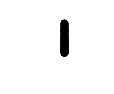

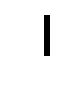

In [18]:
from google.colab import files
from skimage.io import imread
from skimage.transform import resize

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

# lê imagem
img = 1.0 - imread(file_name, as_grey=True)
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.axis('off')

# resize para 8x8
resized = resize(img, (8, 8), mode='constant')
plt.figure(figsize=(1,1))
plt.imshow(resized)
plt.axis('off')

# formata matriz 8x8 como vetor de 64 posições
x = np.atleast_2d(resized.flatten())

bigprint('scikit:', clf.predict(x))
bigprint('nosso:', myclf.predict(x))

!rm {file_name}